
### ESTRUCTURA DE DATOS

* `Casos Obtenidos:` 6,775
* `Casos Estudiados:` 6,775
* `Cantidad de pacientes:` 1,566
* `Cantidad de imagenes:` 10,239
* `Tipo:` MG (Mamografia)
* `Tamaño:` 6 GB JPEG

In [54]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

In [55]:
dicom_data = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
imagen_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [56]:
dicom_data.head(5)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [57]:
imagenes_seg = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
imagenes_seg.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [58]:
imagenes_seg = imagenes_seg.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imagen_dir))
imagenes_seg.head()

0     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
3     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
6     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
7     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
10    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

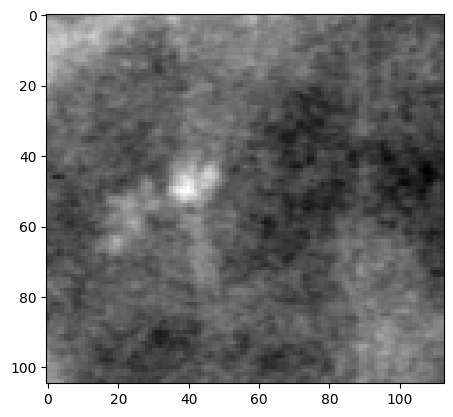

In [59]:
for file in imagenes_seg[0:10]:
    mostrar_imagenes_seg = PIL.Image.open(file)
    gray_img= mostrar_imagenes_seg.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [60]:
imagen_entera_mamograma = dicom_data[dicom_data.SeriesDescription ==  'full mammogram images'].image_path
imagen_entera_mamograma.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [61]:
imagen_entera_mamograma = imagen_entera_mamograma.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imagen_dir))
imagen_entera_mamograma.head()

1     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
2     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
11    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
12    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
15    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

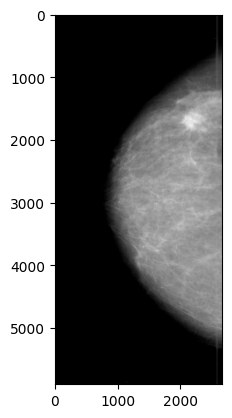

In [62]:
for file  in imagen_entera_mamograma[0:10]:
    muestra_imagen_entera_mamograma = PIL.Image.open(file)
    gray_img= muestra_imagen_entera_mamograma.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [63]:
#Region de interes
ROI_mask_imagenes = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_imagenes.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [64]:
ROI_mask_imagenes = ROI_mask_imagenes.apply(lambda x: x.replace('CBIS-DDSM/jpeg', imagen_dir))
ROI_mask_imagenes.head()

5     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
8     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
9     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
14    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
20    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

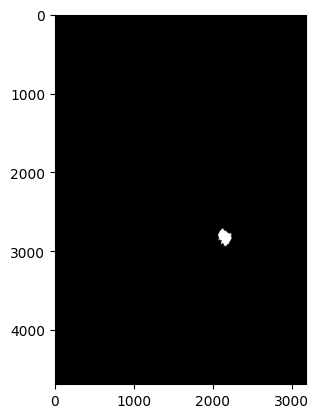

In [65]:
for file  in ROI_mask_imagenes[0:10]:
    muestra_ROI_mask_imagenes = PIL.Image.open(file)
    gray_img= muestra_ROI_mask_imagenes.convert("L")
    plt.imshow(gray_img, cmap='gray')

---

In [66]:
calculo_case_df = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')

In [67]:
calculo_case_df.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [68]:
calculo_masivo_case_df = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')

In [69]:
calculo_masivo_case_df.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


### Data Cleaning

In [70]:
data_limpia_dicom = dicom_data.copy()
data_limpia_dicom.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [71]:
data_limpia_dicom.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True) 

In [72]:
data_limpia_dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [73]:
data_limpia_dicom.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [74]:
data_limpia_dicom['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)

In [75]:
data_limpia_dicom['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [76]:
data_limpia_dicom.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [77]:
Data_cleaning_1 = calculo_case_df.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'tipo_calculo'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'distribucion_calculo'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'vista_imagen'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'izq_o_der_mama'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'densidad_mama'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'tipo_abnormalidad'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['tipo_calculo'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['distribucion_calculo'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['tipo_abnormalidad'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['vista_imagen'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['izq_o_der_mama'].astype('category')
Data_cleaning_1.isna().sum()

patient_id                   0
densidad_mama                0
izq_o_der_mama               0
vista_imagen                 0
abnormality id               0
tipo_abnormalidad            0
tipo_calculo                20
distribucion_calculo       376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
calc_type                   20
calc_distribution          376
abnormality_type             0
image_view                   0
left_or_right_breast         0
dtype: int64

In [78]:
Data_cleaning_1['tipo_calculo'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['distribucion_calculo'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

patient_id                   0
densidad_mama                0
izq_o_der_mama               0
vista_imagen                 0
abnormality id               0
tipo_abnormalidad            0
tipo_calculo                 0
distribucion_calculo         0
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
calc_type                   20
calc_distribution          376
abnormality_type             0
image_view                   0
left_or_right_breast         0
dtype: int64

In [79]:
Data_cleaning_2 = calculo_masivo_case_df.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'forma_masa'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'izq_o_der_mama'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'limites_masa'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'vista_imagen'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'tipo_abnormalidad'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['izq_o_der_mama'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['vista_imagen'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['limites_masa'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['forma_masa'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['tipo_abnormalidad'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
izq_o_der_mama              0
vista_imagen                0
abnormality id              0
tipo_abnormalidad           0
forma_masa                  4
limites_masa               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
left_or_right_breast        0
image_view                  0
mass_margins               43
mass_shape                  4
abnormality_type            0
dtype: int64

In [80]:
Data_cleaning_2['forma_masa'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['limites_masa'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
izq_o_der_mama              0
vista_imagen                0
abnormality id              0
tipo_abnormalidad           0
forma_masa                  0
limites_masa                0
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
left_or_right_breast        0
image_view                  0
mass_margins               43
mass_shape                  4
abnormality_type            0
dtype: int64

---

### Data Visualization

In [28]:
mama_imagenes = glob.glob('/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [81]:
for imgname in mama_imagenes[:5]:
    print(imgname)

/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png
/kaggle/input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png


In [82]:
imagenes_sin_cancer = []
imagenes_con_cancer = []

for img in mama_imagenes:
    if img[-5] == '0' :
        imagenes_sin_cancer.append(img)
    
    elif img[-5] == '1' :
        imagenes_con_cancer.append(img)

In [83]:
sin_cancer_num = len(imagenes_sin_cancer)  # No cancer
con_cancer_num = len(imagenes_con_cancer)   # Cancer 
        
total_imagenes_num = sin_cancer_num + con_cancer_num
        
print('Numero de imagenes sin cancer: {}' .format(sin_cancer_num))   
print('Numero de imagenes con cancer : {}' .format(con_cancer_num))   
print('Total de imagenes : {}' .format(total_imagenes_num))

Numero de imagenes sin cancer: 198738
Numero de imagenes con cancer : 78786
Total de imagenes : 277524


In [84]:
data_conocida_1 = pd.DataFrame({'Estado de paciente' : ['0','1'],'Cantidad de paciente' : [198738,78786]})

In [85]:
bar = px.bar(data_frame=data_conocida_1, x = 'Estado de paciente', y='Cantidad de paciente', color='Estado de paciente')
bar.update_layout(title_text='Numero de Pacientes con cancer (1) y Pacientes sin cancer (0)', title_x=0.5)
bar.show()

In [86]:
r= pd.DataFrame(data_limpia_dicom['SeriesDescription'].value_counts())
r= r.reset_index()
r= r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription_counts,count
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [95]:
ba_1 = px.bar(data_frame=data_limpia_dicom, x='SeriesDescription', color='SeriesDescription',
              title='Types of images used')
ba_1.update_layout(title_text='Tipos de imagenes Utilizadas', title_x=0.5)
ba_1.show()

from cbis-ddsm-breast-cancer-image-dataset : This study depends on Three types of images ; `cropped images` , `ROI images` , `Full mammogram images` . from this graph we conclude that `cropped images` is the most used between them

In [36]:
f= pd.DataFrame(data_limpia_dicom['BodyPartExamined'].value_counts())
f= f.reset_index()
f= f.rename(columns={'BodyPartExamined':'PartesExaminadas', 'index':'Breast part Examined'})
f

,PartesExaminadas,count
0,BREAST,9671
1,Left Breast,318
2,Right Breast,248


In [96]:
ba = px.bar(data_frame=f, x="PartesExaminadas", y="count", color="PartesExaminadas")
ba.update_layout(title_text='Parte Examinada', title_x=0.5, yaxis=dict(type='log'))
ba.show()

**The Most Part Examined is Breast "All" = left and also right**

In [38]:
data_conocida_2 = pd.DataFrame({'Anomalia':[Data_cleaning_1.abnormality_type[0],Data_cleaning_2.abnormality_type[0]],
                               'Cantidad_de_Anomalia':[len(Data_cleaning_1),len(Data_cleaning_2)]})
data_conocida_2

,Anomalia,Cantidad_de_Anomalia
0,calcification,1546
1,mass,1318


In [39]:
bar_2 =px.bar(data_frame=data_conocida_2, x = 'Anomalia', y='Cantidad_de_Anomalia', color = 'Anomalia')
bar_2.update_layout(title_text='Tipos de Anomalia de Cancer', title_x=0.5)
bar_2.show()

from this graph: 
There are two abnormalities of breast cancer:
- Calcification abnormality
- Mass abnormality 

**Most cases are with calcification abnormalities**

In [40]:
x = Data_cleaning_1.left_or_right_breast.value_counts().RIGHT
y = Data_cleaning_1.left_or_right_breast.value_counts().LEFT
print(x,y)

728 818


In [41]:
data_conocida_3 = pd.DataFrame({'izquierda_o_derecha':['Derecho','Izquierdo'] , 'Cantidad':[x,y]})
data_conocida_3

,izquierda_o_derecha,Cantidad
0,Derecho,728
1,Izquierdo,818


In [42]:
conocida_3 = px.bar(data_conocida_3, y= 'Cantidad', x='izquierda_o_derecha',color = 'izquierda_o_derecha')
conocida_3.update_layout(title_text=' Clasificación de Cancer por Posición ', title_x=0.5)
conocida_3.show()

**For calcification cancer, most cases are usually in the left breast.**

In [43]:
z = pd.DataFrame(Data_cleaning_1['tipo_calculo'].value_counts())
z = z.reset_index()
z= z.rename(columns={'tipo_calculo':'tipo_calculo_conteo'})
z

,tipo_calculo_conteo,count
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


**Calcification cancer has 45 types, the majority of which are PLEOMORPHIC.**

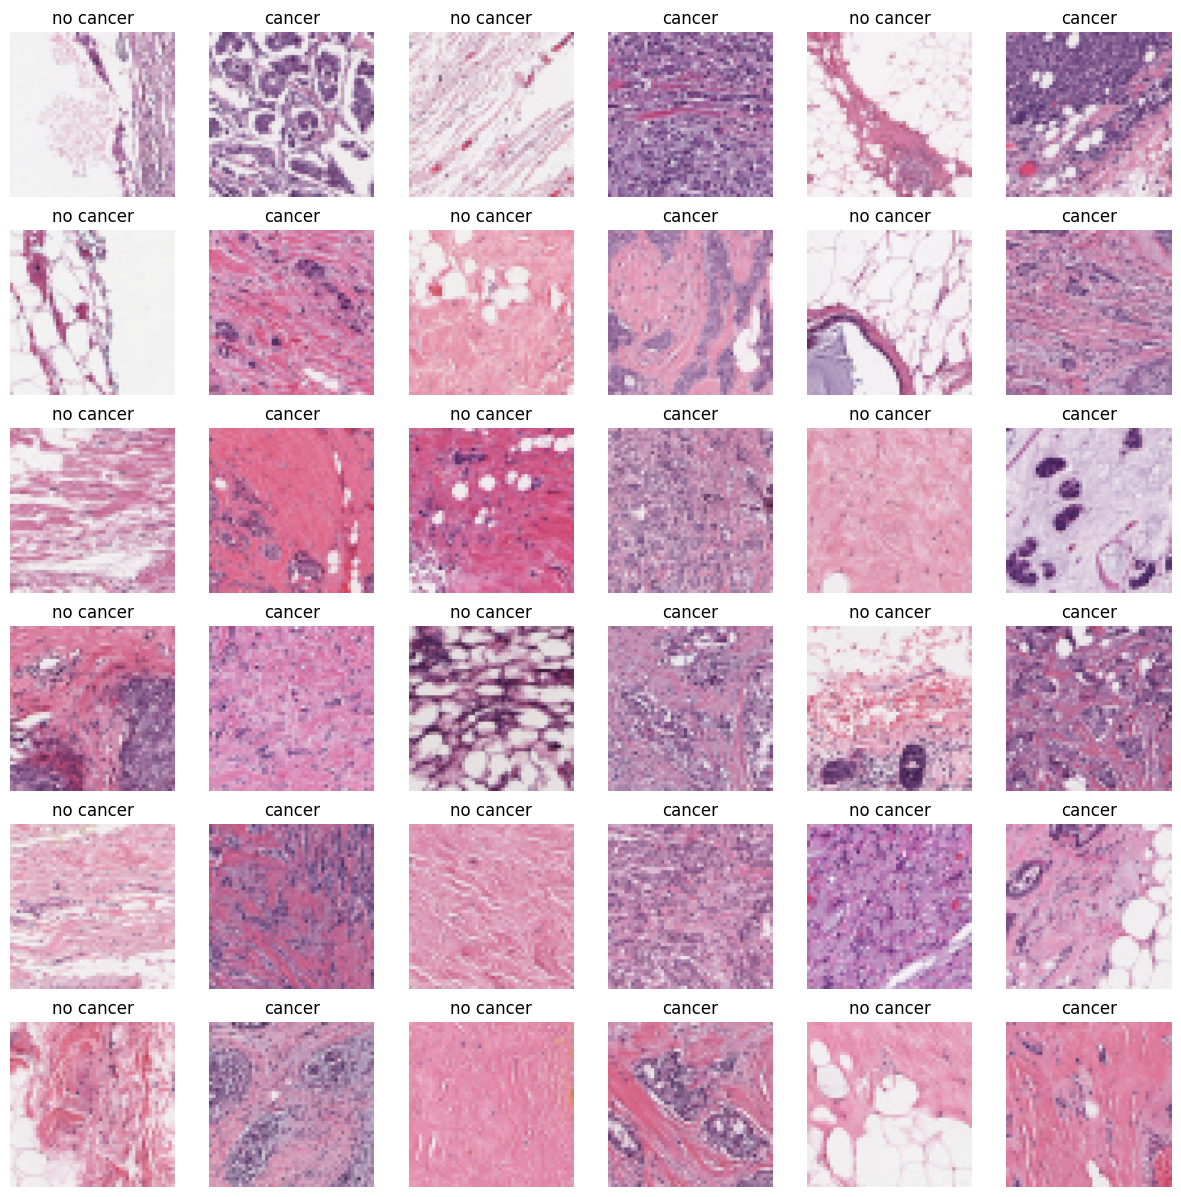

In [44]:
plt.figure(figsize = (15, 15))

algunas_sin = np.random.randint(0, len(imagenes_sin_cancer), 18)
algunas_con = np.random.randint(0, len(imagenes_con_cancer), 18)

s = 0
for num in algunas_sin:
    
        img = image.image_utils.load_img((imagenes_sin_cancer[num]), target_size=(100, 100))
        img = image.image_utils.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in algunas_con:
    
        img = image.image_utils.load_img((imagenes_con_cancer[num]), target_size=(100, 100))
        img = image.image_utils.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

---
### Data Modeling

In [45]:
#Tomar alealtoriamente una imagen de cada caso
algunas_imagenes_sin = random.sample(imagenes_sin_cancer, len(imagenes_sin_cancer))
algunas_imagenes_con = random.sample(imagenes_con_cancer, len(imagenes_con_cancer))

# Creamos los arreglos donde se almacenaran estas
imagen_sin_arr = []  
imagen_con_arr = []  

# ciclos para revisar cada una de las imagenes

for img in algunas_imagenes_sin:
    # leer cada imagen con color
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # interpolar linealmente la imagen para reasignarle el tamaño
    n_img_size = cv2.resize(n_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # agregar la imagen modificada al arreglo
    imagen_sin_arr.append([n_img_size, 0])

# ciclos para revisar cada una de las imagenes con cancer
for img in algunas_imagenes_con:
    # leer cada imagen con color
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    # interpolar linealmente la imagen para reasignarle el tamaño
    c_img_size = cv2.resize(c_img, (50, 50), interpolation=cv2.INTER_LINEAR)
    # agregar la imagen modificada al arreglo
    imagen_con_arr.append([c_img_size, 1])

KeyboardInterrupt: 

In [ ]:
X = []  # arrreglo de imagenes
y = []  # arreglo de etiquetas

# Concatenar en un solo arreglo las imagenes con y sin cancer para el modelo de entrenamiento
imagenes_mama_arr = np.concatenate((imagen_sin_arr, imagen_con_arr))

# Mezclar aleatoriamente los elemtnos de las imagenes de la mamografia
random.shuffle(imagenes_mama_arr)

# Recorrer cada elemento del arreglo tanto las etiquetas con cada una de las imagenes
for feature, label in imagenes_mama_arr:
    # agregamos al arreglo de imagenes
    X.append(feature)
    # Aagregar a las etiquetas seleccionadas
    y.append(label)

# Convertimos estos arreglos en binario para poder ser procesados
X = np.array(X)
y = np.array(y)

# La forma del arreglo impresa
print('X shape: {}'.format(X.shape))

In [ ]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba, con un tamaño de prueba del 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Definir una tasa (porcentaje) para submuestrear los datos de entrenamiento
rate = 0.5

# Calcule la cantidad de muestras que se mantendrán en los datos de entrenamiento según la tasa
num = int(X.shape[0] * rate)

# Convertir las etiquetas categóricas en 'y_train' y 'y_test' al formato codificado one-hot
y_train = to_categorical(y_train, 2)  
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Datos argumentados de las imagenes

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear generadores de datos para entrenamiento y pruebas.
train_datagen = datagen.flow(X_train, y_train, batch_size=32)
test_datagen = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

In [ ]:
# Definir una devolución de llamada EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitorear la pérdida de validación
    patience=5,                  # Número de épocas sin mejora después de las cuales se detendrá el entrenamiento
    min_delta=1e-7,              # Cambio mínimo en la cantidad monitoreada para ser considerado una mejora.
    restore_best_weights=True,   # Restaurar los pesos del modelo de la época con el mejor valor de cantidad monitoreada
)

# Definir una devolución de llamada ReduceLROnPlateau
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitorear la pérdida de validación
    factor=0.2,           # Factor por el cual se reducirá la tasa de aprendizaje
    patience=2,           # Número de épocas sin mejora después de las cuales se reducirá la tasa de aprendizaje
    min_delta=1e-7,       # Cambio mínimo en la cantidad monitoreada para desencadenar una reducción de la tasa de aprendizaje
    cooldown=0,           # Número de épocas a esperar antes de reanudar el funcionamiento normal después de la reducción de la tasa de aprendizaje
    verbose=1             # Modo detallado (1: mensajes de actualización, 0: sin mensajes)
)

In [ ]:
# Establecer una semilla aleatoria para la reproducibilidad
tf.random.set_seed(42)

# Creando un modelo secuencial 

model = tf.keras.Sequential([
    # Capa convolucional con 32 filtros, un kernel de 3x3, 'mismo' relleno y activación ReLU
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.BatchNormalization(),
    # Capa MaxPooling con un tamaño de grupo de 2x2 y pasos predeterminada (2)
    tf.keras.layers.MaxPooling2D(strides=2),
    
    # Capa convolucional con 64 filtros, un kernel de 3x3, 'mismo' relleno y activación ReLU
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # Capa MaxPooling con un tamaño de grupo de 2x2 y pasos predeterminada (2)
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Capa convolucional con 128 filtros, un kernel de 3x3, 'mismo' relleno y activación ReLU
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # Capa MaxPooling con un tamaño de grupo de 2x2 y pasos predeterminada (2)
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
   # Capa convolucional con 128 filtros, un kernel de 3x3, 'mismo' relleno y activación ReLU
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # Capa MaxPooling con un tamaño de grupo de 2x2 y pasos predeterminada (2)
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Aplanar la salida para prepararla para capas completamente conectadas
    tf.keras.layers.Flatten(),
    
    # Capa completamente conectada con 128 unidades y activación ReLU
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Capa de salida con 2 unidades (clasificación binaria) y activación softmax
    tf.keras.layers.Dense(2, activation='softmax')
])

# Mostrar un resumen de la arquitectura del modelo.
model.summary()

# Compile el modelo con el optimizador Adam, la pérdida de entropía cruzada binaria y la métrica de precisión
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Poner el modelo a aprendizaje con 25 epocas para lograr que la red este perfecta
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 25,
                    batch_size = 75,
                    callbacks=[early_stopping, plateau])

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicción de Etiquetas")
plt.ylabel("Etiqueta Verdaderas")
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelo Fallido')
plt.ylabel('Fallo')
plt.xlabel('Epoca')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)
prediction

### Testing the Model

In [ ]:
# Definir un mapeo de índices de clase a etiquetas legibles por humanos
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Definiendo la clasificacion de los tipos
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}

# Definir una función para trazar una imagen a partir de una matriz y localizar en un cuadrado la zona revisada
def img_plot(arr, index=0):
    plt.title('Imagen Testeada')
    
    # Mostrar la imagen en el arreglo
    plt.imshow(arr[index])

# asignar el indice de la imagen
index = 90

# Trazar una imagen de la matriz X_test usando la función img_plot
img_plot(X_test, index)

# Extraemos una sola imagen de X_test según el índice especificado
input = X_test[index:index+1]

############# Haz una predicción usando el modelo CNN y obtén la clase con mayor probabilidad#########
predicted_class_index = model.predict(input)[0].argmax()

# Obtener la etiqueta verdadera de la matriz y_test
true_class_index = y_test[index].argmax()

# Obtenga las etiquetas previstas y verdaderas
predicted_label = class_labels[predicted_class_index]
true_label = class_labels[true_class_index]

# Obtenga el tipo de calcificación según el índice de clase previsto
calcification_type = calcification_types[predicted_class_index]

# Imprimir el resultado de la predicción con el tipo de calcificación.
print('Diagnostico Predecido:', predicted_label)
print('Tipo de Clasificación:', calcification_type)
print('Diagnostico Verdadero:', true_label)

#### Saving the model

In [ ]:
model.save('CNN_model.h5')

### Testing the Model on MINI DDSM Dataset

In [ ]:
## Directorio que contiene las imágenes
imgs_dir = glob.glob('/kaggle/input/miniddsm2/MINI-DDSM-Complete-JPEG-8/Benign/**/*.jpeg', recursive=True)

image_path = '/kaggle/input/miniddsm2/MINI-DDSM-Complete-JPEG-8/Benign/0029/C_0029_1.LEFT_CC.jpg'



In [ ]:
# Definir una función para cargar y preprocesar una imagen
def load_and_preprocess_image(image_path, target_size=(50, 50)):
    try:
        # cargar, procesar y guardar
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convertir formado de color de las imagenes
        img = cv2.resize(img, target_size)  # reasignar un tamaño estandar para la imagen
        img_array = img / 255.0  # pixeles normalizados

        return img_array
    except Exception as e:
        print(f"Error de imagen procesado {image_path}: {str(e)}")
        return None

In [ ]:
img_array = load_and_preprocess_image(image_path)


In [ ]:
if img_array is not None:
    # Crear un lote para predicción (incluso si es una sola imagen)
    img_batch = np.expand_dims(img_array, axis=0)

    # Hacer y declarar las predicciones
    predictions = model.predict(img_batch)

    # Suponiendo que su modelo predice probabilidades binarias, puede obtener la probabilidad para la clase "Cáncer"
    cancer_probability = predictions[0][0]  # Suponiendo que "Cáncer" es la primera clase

   # Obtener la etiqueta de clase prevista
    predicted_class = "Cancer" if cancer_probability >= 0.5 else "Normal"
    plt.imshow(img_array)
    plt.title(f'Clase Predicha: {predicted_class}\nProbabilidad de Cancer: {cancer_probability:.4f}')
    plt.axis('off')
    plt.show()
else:
    print("ERROR al cargar y preprocesar la imagen.")